In [243]:
import numpy as np #Importing Library
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from pandas_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense
from keras.models import Sequential

ModuleNotFoundError: No module named 'pandas_profiling'

In [192]:
df = pd.read_csv("GME_stock.csv") #Loading Data
df.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            4773 non-null   object 
 1   open_price      4773 non-null   float64
 2   high_price      4773 non-null   float64
 3   low_price       4773 non-null   float64
 4   close_price     4773 non-null   float64
 5   volume          4773 non-null   float64
 6   adjclose_price  4773 non-null   float64
dtypes: float64(6), object(1)
memory usage: 261.1+ KB


In [194]:
df['date']=pd.to_datetime(df['date']) #Convert to DateTime

In [195]:
df.set_index('date',inplace=True) #Changing Date column to index

In [196]:
df = df.iloc[::-1] #Reversing DataFrame to be from old to new Date 

In [197]:
df

,open_price,high_price,low_price,close_price,volume,adjclose_price
date,,,,,,
2002-02-13,9.625000,10.060000,9.525000,10.050000,19054000.0,6.766666
2002-02-14,10.175000,10.195000,9.925000,10.000000,2755400.0,6.733003
2002-02-15,10.000000,10.025000,9.850000,9.950000,2097400.0,6.699336
2002-02-19,9.900000,9.900000,9.375000,9.550000,1852600.0,6.430017
2002-02-20,9.600000,9.875000,9.525000,9.875000,1723200.0,6.648838
...,...,...,...,...,...,...
2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002
2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996


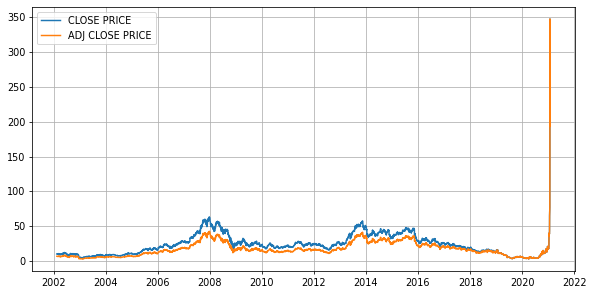

In [198]:
plt.figure(figsize=(10,5),dpi=70)
plt.plot(df['close_price'],label="CLOSE PRICE")
plt.plot(df['adjclose_price'],label="ADJ CLOSE PRICE")
plt.grid()
plt.legend()
plt.show()

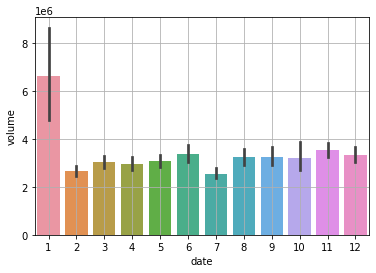

In [199]:
sns.barplot(x=df.index.month,y=df.volume,data=df)
plt.grid()
plt.show()

In [200]:
features = df.drop(['close_price','adjclose_price'],axis=1)
target = df[['adjclose_price']]

In [201]:
features.head()

,open_price,high_price,low_price,volume
date,,,,
2002-02-13,9.625,10.060,9.525,19054000.0
2002-02-14,10.175,10.195,9.925,2755400.0
2002-02-15,10.000,10.025,9.850,2097400.0
2002-02-19,9.900,9.900,9.375,1852600.0
2002-02-20,9.600,9.875,9.525,1723200.0


In [202]:
target.head()

,adjclose_price
date,
2002-02-13,6.766666
2002-02-14,6.733003
2002-02-15,6.699336
2002-02-19,6.430017
2002-02-20,6.648838


In [203]:
scaller_data = MinMaxScaler(feature_range=(0,1)) #Standarlized Features
scalled_features = scaller_data.fit_transform(features)
scalled_features

array([[0.01924825, 0.01483148, 0.02822302, 0.0965284 ],
       [0.02081084, 0.01511269, 0.0298462 , 0.01367634],
       [0.02031366, 0.01475857, 0.02954186, 0.01033147],
       ...,
       [0.24350816, 0.30633671, 0.31501845, 0.9075012 ],
       [1.        , 0.78544349, 1.        , 0.47444099],
       [0.74478666, 1.        , 0.44507568, 0.29865295]])

In [204]:
scaller_target = MinMaxScaler(feature_range=(0,1))
scalled_target = scaller_target.fit_transform(target)
scalled_target

array([[0.01220882],
       [0.01211123],
       [0.01201363],
       ...,
       [0.42157641],
       [1.        ],
       [0.55382564]])

In [205]:
feature_len = int(len(scalled_features)*0.8)
target_len = int(len(scalled_target)*0.8)

In [206]:
train_feature = scalled_features[:feature_len]
train_target = scalled_target[:target_len]

In [207]:
test_feature = scalled_features[feature_len:]
test_target = scalled_target[target_len:]

In [208]:
train_feature.shape

(3818, 4)

In [209]:
test_feature.shape

(955, 4)

In [210]:
len(scalled_features) == (len(train_feature)+len(test_feature))

True

In [211]:
X_train , y_train = [], []
timesteps = 80

for i in range (timesteps,len(train_feature)):
    X_train.append(train_feature[i-timesteps:i,:])
    y_train.append(train_target[i,0])

In [212]:
X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(3738, 80, 4)
(3738,)


In [213]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],4)
X_train.shape

(3738, 80, 4)

In [214]:
model1 = Sequential()
model1.add(LSTM(16,activation='tanh',input_shape=(X_train.shape[1],4),return_sequences=False))
model1.add(Dense(1))
model1.compile(optimizer='adam',loss='mse')

In [215]:
model1.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
117/117 [==============================] - 4s 18ms/step - loss: 4.2022e-05
Epoch 2/100
117/117 [==============================] - 2s 18ms/step - loss: 1.7108e-05
Epoch 3/100
117/117 [==============================] - 2s 19ms/step - loss: 1.6586e-05
Epoch 4/100
117/117 [==============================] - 2s 18ms/step - loss: 1.6313e-05
Epoch 5/100
117/117 [==============================] - 2s 18ms/step - loss: 1.6504e-05
Epoch 6/100
117/117 [==============================] - 2s 18ms/step - loss: 1.4791e-05
Epoch 7/100
117/117 [==============================] - 2s 18ms/step - loss: 1.5001e-05
Epoch 8/100
117/117 [==============================] - 2s 17ms/step - loss: 1.5781e-05
Epoch 9/100
117/117 [==============================] - 2s 17ms/step - loss: 1.5349e-05
Epoch 10/100
117/117 [==============================] - 2s 18ms/step - loss: 1.4658e-05
Epoch 11/100
117/117 [==============================] - 2s 18ms/step - loss: 1.5252e-05
Epoch 12/100
117/117 [===================

117/117 [==============================] - 2s 18ms/step - loss: 9.4629e-06
Epoch 95/100
117/117 [==============================] - 2s 18ms/step - loss: 9.8367e-06
Epoch 96/100
117/117 [==============================] - 2s 18ms/step - loss: 9.6416e-06
Epoch 97/100
117/117 [==============================] - 2s 18ms/step - loss: 9.3333e-06
Epoch 98/100
117/117 [==============================] - 2s 18ms/step - loss: 1.0219e-05
Epoch 99/100
117/117 [==============================] - 2s 18ms/step - loss: 9.6391e-06
Epoch 100/100
117/117 [==============================] - 2s 18ms/step - loss: 9.8818e-06


In [216]:
test = scalled_features[len(train_feature)-80:]

In [217]:
X_test=  []
for i in range(timesteps,len(test)):
    X_test.append(test[i-timesteps:i,:])


In [218]:
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],4)

In [219]:
m1_prediction = model1.predict(X_test)
normal_model1_price = scaller_target.inverse_transform(m1_prediction)


30/30 [==============================] - 1s 4ms/step


In [220]:
test_normal_price = scaller_target.inverse_transform(test_target)

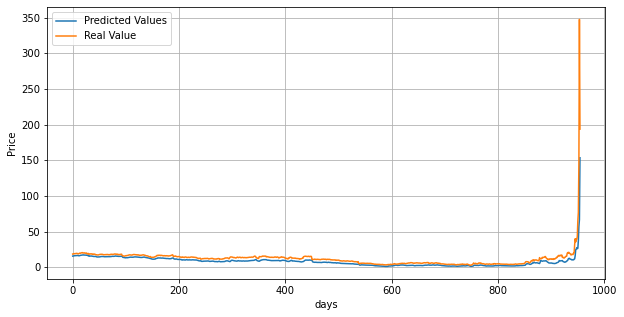

In [221]:
plt.figure(figsize=(10,5))
plt.xlabel('days')
plt.ylabel('Price')
plt.plot(normal_model1_price,label='Predicted Values')
plt.plot(test_normal_price,label='Real Value')
plt.legend()
plt.grid()
plt.show()

In [237]:
from sklearn.metrics import r2_score
rm1=r2_score(test_normal_price,normal_model1_price)

# model 2

In [223]:
model2 = Sequential()
model2.add(LSTM(32,activation='tanh',input_shape=(X_train.shape[1],4),return_sequences=False))
model2.add(Dense(1))
model2.compile(optimizer='adam',loss='mse')

In [224]:
model2.fit(X_train,y_train,batch_size=64,epochs=150)

Epoch 1/150
59/59 [==============================] - 3s 20ms/step - loss: 5.8002e-04
Epoch 2/150
59/59 [==============================] - 1s 19ms/step - loss: 2.9048e-05
Epoch 3/150
59/59 [==============================] - 1s 21ms/step - loss: 2.5767e-05
Epoch 4/150
59/59 [==============================] - 1s 21ms/step - loss: 2.3163e-05
Epoch 5/150
59/59 [==============================] - 1s 21ms/step - loss: 2.1725e-05
Epoch 6/150
59/59 [==============================] - 1s 19ms/step - loss: 2.0673e-05
Epoch 7/150
59/59 [==============================] - 1s 19ms/step - loss: 2.0449e-05
Epoch 8/150
59/59 [==============================] - 1s 20ms/step - loss: 1.9406e-05
Epoch 9/150
59/59 [==============================] - 1s 19ms/step - loss: 1.8408e-05
Epoch 10/150
59/59 [==============================] - 1s 21ms/step - loss: 1.8736e-05
Epoch 11/150
59/59 [==============================] - 1s 22ms/step - loss: 1.7952e-05
Epoch 12/150
59/59 [==============================] - 1s 21ms/s

59/59 [==============================] - 1s 19ms/step - loss: 1.1171e-05
Epoch 97/150
59/59 [==============================] - 1s 19ms/step - loss: 1.0198e-05
Epoch 98/150
59/59 [==============================] - 1s 19ms/step - loss: 9.8235e-06
Epoch 99/150
59/59 [==============================] - 1s 19ms/step - loss: 9.7152e-06
Epoch 100/150
59/59 [==============================] - 1s 19ms/step - loss: 1.0013e-05
Epoch 101/150
59/59 [==============================] - 1s 19ms/step - loss: 1.0113e-05
Epoch 102/150
59/59 [==============================] - 1s 19ms/step - loss: 1.0251e-05
Epoch 103/150
59/59 [==============================] - 1s 19ms/step - loss: 1.0070e-05
Epoch 104/150
59/59 [==============================] - 1s 19ms/step - loss: 1.0832e-05
Epoch 105/150
59/59 [==============================] - 1s 19ms/step - loss: 1.0217e-05
Epoch 106/150
59/59 [==============================] - 1s 19ms/step - loss: 1.0526e-05
Epoch 107/150
59/59 [==============================] - 1s 19

In [225]:
m2_prediction = model2.predict(X_test)
normal_model2_price = scaller_target.inverse_transform(m2_prediction)


30/30 [==============================] - 1s 7ms/step


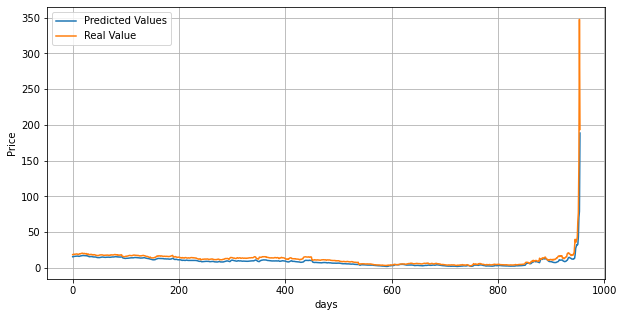

In [226]:
plt.figure(figsize=(10,5))
plt.xlabel('days')
plt.ylabel('Price')
plt.plot(normal_model2_price,label='Predicted Values')
plt.plot(test_normal_price,label='Real Value')
plt.legend()
plt.grid()
plt.show()

In [238]:
rm2=r2_score(test_normal_price,normal_model2_price)

# model 3

In [229]:
model3 = Sequential()
model3.add(LSTM(16,activation='tanh',input_shape=(X_train.shape[1],4),return_sequences=True))
model3.add(LSTM(8,activation='tanh',return_sequences=False))
model3.add(Dense(1))
model3.compile(optimizer='adam',loss='mse')

In [230]:
model3.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
117/117 [==============================] - 7s 33ms/step - loss: 1.0186e-04
Epoch 2/100
117/117 [==============================] - 4s 34ms/step - loss: 2.5292e-05
Epoch 3/100
117/117 [==============================] - 4s 34ms/step - loss: 2.3120e-05
Epoch 4/100
117/117 [==============================] - 4s 34ms/step - loss: 2.3693e-05
Epoch 5/100
117/117 [==============================] - 4s 33ms/step - loss: 2.2214e-05
Epoch 6/100
117/117 [==============================] - 4s 34ms/step - loss: 2.0253e-05
Epoch 7/100
117/117 [==============================] - 4s 34ms/step - loss: 1.9602e-05
Epoch 8/100
117/117 [==============================] - 4s 35ms/step - loss: 1.9229e-05
Epoch 9/100
117/117 [==============================] - 4s 34ms/step - loss: 1.8906e-05
Epoch 10/100
117/117 [==============================] - 4s 34ms/step - loss: 1.8782e-05
Epoch 11/100
117/117 [==============================] - 4s 34ms/step - loss: 1.8113e-05
Epoch 12/100
117/117 [===================

117/117 [==============================] - 4s 33ms/step - loss: 9.7440e-06
Epoch 95/100
117/117 [==============================] - 4s 35ms/step - loss: 1.0552e-05
Epoch 96/100
117/117 [==============================] - 4s 35ms/step - loss: 9.7930e-06
Epoch 97/100
117/117 [==============================] - 4s 35ms/step - loss: 9.4062e-06
Epoch 98/100
117/117 [==============================] - 4s 34ms/step - loss: 9.7000e-06
Epoch 99/100
117/117 [==============================] - 4s 35ms/step - loss: 9.6663e-06
Epoch 100/100
117/117 [==============================] - 4s 35ms/step - loss: 1.0010e-05


In [231]:
m3_prediction = model3.predict(X_test)
normal_model3_price = scaller_target.inverse_transform(m3_prediction)


30/30 [==============================] - 1s 8ms/step


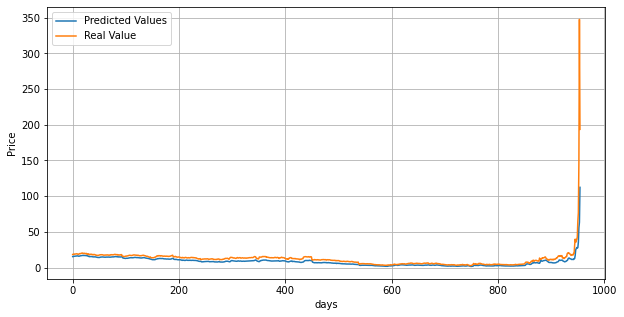

In [232]:
plt.figure(figsize=(10,5))
plt.xlabel('days')
plt.ylabel('Price')
plt.plot(normal_model3_price,label='Predicted Values')
plt.plot(test_normal_price,label='Real Value')
plt.legend()
plt.grid()
plt.show()

In [239]:
rm3=r2_score(test_normal_price,normal_model3_price)

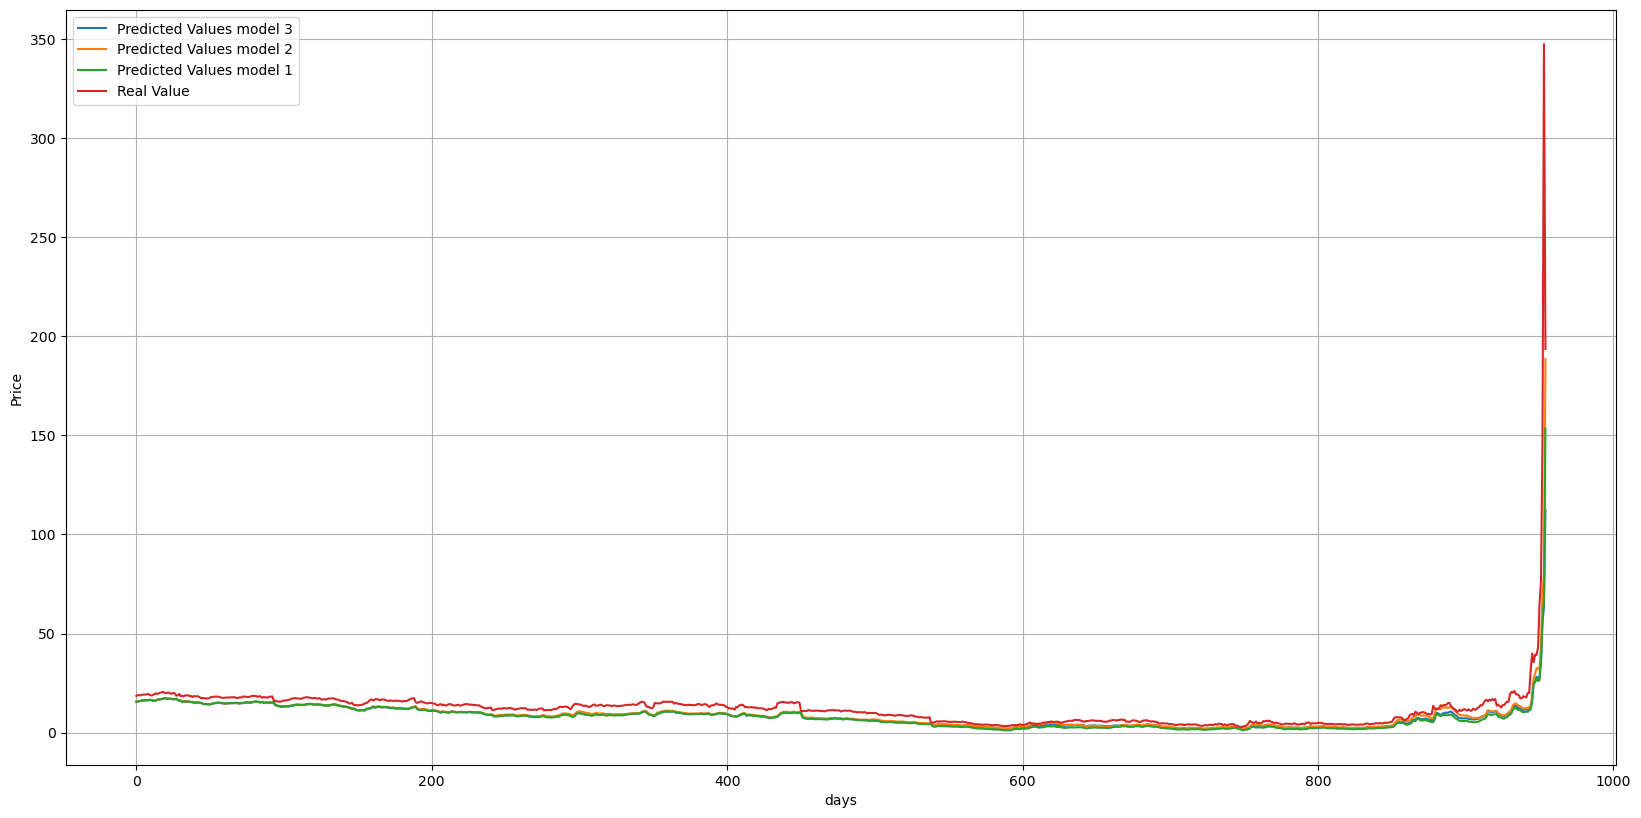

In [241]:
plt.figure(figsize=(20,10),dpi=100)
plt.xlabel('days')
plt.ylabel('Price')
plt.plot(normal_model3_price,label='Predicted Values model 3')
plt.plot(normal_model2_price,label='Predicted Values model 2')
plt.plot(normal_model1_price,label='Predicted Values model 1')
plt.plot(test_normal_price,label='Real Value')
plt.legend()
plt.grid()
plt.show()

In [242]:
pd.DataFrame({"Model 1 Score": rm1,'Model 2 Score ': rm2,'Model 3 Score': rm3},index=['R2Score'])

,Model 1 Score,Model 2 Score,Model 3 Score
R2Score,0.468094,0.548805,0.444383
